<a href="https://colab.research.google.com/github/sandalis05/MIT-FutureMakers/blob/main/Housing%20Prices/Predict_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

df = pd.read_csv('housepricedata.csv')
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [6]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [7]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [9]:
from sklearn.model_selection import train_test_split

#train split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
#validation and test split
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 10ms/step - loss: 0.6967 - accuracy: 0.4723 - val_loss: 0.6915 - val_accuracy: 0.5068
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.4866 - val_loss: 0.6864 - val_accuracy: 0.5205
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5158 - val_loss: 0.6806 - val_accuracy: 0.5388
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5186 - val_loss: 0.6745 - val_accuracy: 0.5982
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5660 - val_loss: 0.6701 - val_accuracy: 0.6484
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6345 - val_loss: 0.6665 - val_accuracy: 0.6758
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6556 - val_loss: 0.6631 - val_accuracy: 0.7260
Epoch 8/100


In [17]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9406


0.9406392574310303

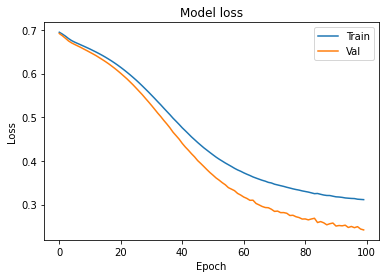

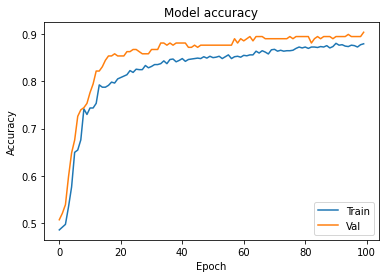

In [21]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [22]:
#model 2 - introducing regularization

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 42ms/step - loss: 0.5978 - accuracy: 0.6867 - val_loss: 0.3355 - val_accuracy: 0.8858
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3653 - accuracy: 0.8543 - val_loss: 0.2937 - val_accuracy: 0.8950
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3156 - accuracy: 0.8677 - val_loss: 0.2654 - val_accuracy: 0.8858
Epoch 4/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3323 - accuracy: 0.8557 - val_loss: 0.4330 - val_accuracy: 0.8265
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3618 - accuracy: 0.8264 - val_loss: 0.2690 - val_accuracy: 0.9178
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3054 - accuracy: 0.8886 - val_loss: 0.2420 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.2631 - accuracy: 0.8820 - val_loss: 0.2343 - val_accuracy: 0.9087
Epoch 

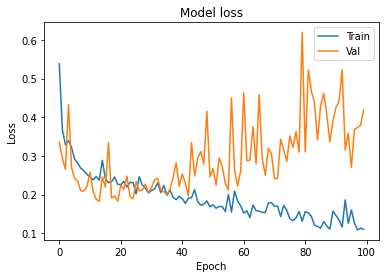

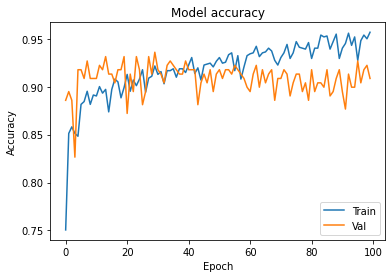

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [25]:
#model 3 - has the model 2 dropout and regularization but reduces overfitting

from keras.layers import Dropout
from keras import regularizers

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 4s 57ms/step - loss: 21.1046 - accuracy: 0.5423 - val_loss: 3.8853 - val_accuracy: 0.8858
Epoch 2/100
32/32 [==============================] - 1s 42ms/step - loss: 2.5039 - accuracy: 0.8274 - val_loss: 0.6323 - val_accuracy: 0.8858
Epoch 3/100
32/32 [==============================] - 1s 44ms/step - loss: 0.6332 - accuracy: 0.8305 - val_loss: 0.4856 - val_accuracy: 0.8904
Epoch 4/100
32/32 [==============================] - 1s 43ms/step - loss: 0.5390 - accuracy: 0.8440 - val_loss: 0.4433 - val_accuracy: 0.9087
Epoch 5/100
32/32 [==============================] - 1s 42ms/step - loss: 0.5192 - accuracy: 0.8524 - val_loss: 0.4307 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 1s 44ms/step - loss: 0.5135 - accuracy: 0.8464 - val_loss: 0.4481 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 44ms/step - loss: 0.5012 - accuracy: 0.8458 - val_loss: 0.4171 - val_accuracy: 0.9041
Epoch

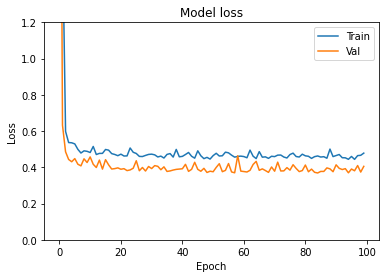

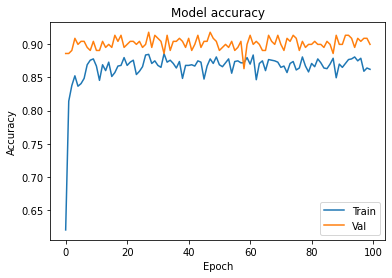

In [26]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()